In [90]:
# Librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

## DIAMOND TEST

In [79]:
# CSV diamonds_test
df_Diamond_test=pd.read_csv('./diamonds_test.csv')
df_Diamond_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


In [80]:
df_Diamond_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
 10  city     13485 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [81]:
# One hot encoding
cat_cols = ['color', 'clarity', 'city', 'cut']
df_Diamond_test = pd.get_dummies(df_Diamond_test, columns=cat_cols, drop_first=True)
df_Diamond_test


,id,carat,depth,table,x,y,z,color_E,color_F,color_G,...,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0,0.79,62.7,60.0,5.82,5.89,3.67,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0.90,63.8,54.0,6.09,6.13,3.90,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.50,62.9,58.0,5.05,5.09,3.19,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,61.9,56.0,5.35,5.32,3.30,1,0,0,...,0,0,0,0,0,0,0,1,0,0
13481,13481,0.71,62.2,55.0,5.71,5.73,3.56,0,0,0,...,0,1,0,0,0,0,0,1,0,0
13482,13482,0.70,61.6,55.0,5.75,5.71,3.53,0,1,0,...,0,0,0,0,1,0,0,1,0,0
13483,13483,0.70,58.8,57.0,5.85,5.89,3.45,0,1,0,...,0,0,0,1,0,0,0,0,0,1


# Predict test

In [82]:
%%time

# Model predictions

predictions = model.predict(df_Diamond_test)

print(type(predictions))

<class 'numpy.ndarray'>
CPU times: total: 15.6 ms
Wall time: 9.97 ms


C:\Users\abarr\miniconda3\envs\M3_ih\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [83]:
df_predictions = pd.DataFrame(predictions, columns=['price']).reset_index()
df_predictions
#df.columns = ['new_col1', 'new_col2', 'new_col3', 'new_col4']

,index,price
0,0,422.703893
1,1,427.222417
2,2,613.334155
3,3,529.381742
4,4,377.950911
...,...,...
13480,13480,345.175283
13481,13481,463.116609
13482,13482,366.619421
13483,13483,402.192110


In [84]:

df_predictions['id']=df_predictions.index
df_predictions

,index,price,id
0,0,422.703893,0
1,1,427.222417,1
2,2,613.334155,2
3,3,529.381742,3
4,4,377.950911,4
...,...,...,...
13480,13480,345.175283,13480
13481,13481,463.116609,13481
13482,13482,366.619421,13482
13483,13483,402.192110,13483


In [56]:
df_predictions_d=df_predictions.drop('index', axis=1)
df_predictions_d

,price,id
0,422.703893,0
1,427.222417,1
2,613.334155,2
3,529.381742,3
4,377.950911,4
...,...,...
13480,345.175283,13480
13481,463.116609,13481
13482,366.619421,13482
13483,402.192110,13483


In [57]:
df_predictions_d.to_csv('train.csv', index=False)

In [93]:
# 5260,04 PUNTOS EN KAGGLE

## DIAMOND TRAIN

In [58]:
# CSV EDA
df_train=pd.read_csv('competi_kaggle.csv')
df_train
 



,index_id,depth,table,x,y,z,color,clarity,city,cut,carat,price
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,J,VS2,Kimberly,Premium,1.21,4268
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,H,VS2,Antwerp,Very Good,0.32,505
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,G,VS1,London,Fair,0.71,2686
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,D,SI1,New York City,Good,0.41,738
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,G,SI1,Dubai,Ideal,1.02,4882
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,G,VS1,New York City,Ideal,1.34,10070
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,F,SI2,Zurich,Good,2.02,12615
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,H,SI1,Tel Aviv,Ideal,1.01,5457
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,J,VS1,Paris,Ideal,0.33,456


In [59]:
x=df_train.drop('index_id', axis=1)
x

,depth,table,x,y,z,color,clarity,city,cut,carat,price
0,62.4,58.0,6.83,6.79,4.25,J,VS2,Kimberly,Premium,1.21,4268
1,63.0,57.0,4.35,4.38,2.75,H,VS2,Antwerp,Very Good,0.32,505
2,65.5,55.0,5.62,5.53,3.65,G,VS1,London,Fair,0.71,2686
3,63.8,56.0,4.68,4.72,3.00,D,SI1,New York City,Good,0.41,738
4,60.5,59.0,6.55,6.51,3.95,G,SI1,Dubai,Ideal,1.02,4882
...,...,...,...,...,...,...,...,...,...,...,...
40450,62.7,57.0,7.10,7.04,4.43,G,VS1,New York City,Ideal,1.34,10070
40451,57.1,60.0,8.31,8.25,4.73,F,SI2,Zurich,Good,2.02,12615
40452,62.7,56.0,6.37,6.42,4.01,H,SI1,Tel Aviv,Ideal,1.01,5457
40453,61.9,54.3,4.45,4.47,2.76,J,VS1,Paris,Ideal,0.33,456


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index_id  40455 non-null  object 
 1   depth     40455 non-null  float64
 2   table     40455 non-null  float64
 3   x         40455 non-null  float64
 4   y         40455 non-null  float64
 5   z         40455 non-null  float64
 6   color     40455 non-null  object 
 7   clarity   40455 non-null  object 
 8   city      40455 non-null  object 
 9   cut       40455 non-null  object 
 10  carat     40455 non-null  float64
 11  price     40455 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 3.7+ MB


In [61]:
# One hot encoding
cat_cols = ['color', 'clarity', 'city', 'cut']
df_train= pd.get_dummies(df_train, columns=cat_cols, drop_first=True)
df_train

,index_id,depth,table,x,y,z,carat,price,color_E,color_F,...,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,1.21,4268,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,0.32,505,0,0,...,0,0,0,0,0,0,0,0,0,1
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,0.71,2686,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,0.41,738,0,0,...,0,1,0,0,0,0,1,0,0,0
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,1.02,4882,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,1.34,10070,0,0,...,0,1,0,0,0,0,0,1,0,0
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,2.02,12615,0,1,...,0,0,0,0,0,1,1,0,0,0
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,1.01,5457,0,0,...,0,0,0,0,1,0,0,1,0,0
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,0.33,456,0,0,...,0,0,1,0,0,0,0,1,0,0


In [70]:
df_train.drop('index_id', axis=1)

,depth,table,x,y,z,carat,price,color_E,color_F,color_G,...,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,62.4,58.0,6.83,6.79,4.25,1.21,4268,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,63.0,57.0,4.35,4.38,2.75,0.32,505,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,65.5,55.0,5.62,5.53,3.65,0.71,2686,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,63.8,56.0,4.68,4.72,3.00,0.41,738,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,60.5,59.0,6.55,6.51,3.95,1.02,4882,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,62.7,57.0,7.10,7.04,4.43,1.34,10070,0,0,1,...,0,1,0,0,0,0,0,1,0,0
40451,57.1,60.0,8.31,8.25,4.73,2.02,12615,0,1,0,...,0,0,0,0,0,1,1,0,0,0
40452,62.7,56.0,6.37,6.42,4.01,1.01,5457,0,0,0,...,0,0,0,0,1,0,0,1,0,0
40453,61.9,54.3,4.45,4.47,2.76,0.33,456,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [71]:
# Load datasets

X, y = make_regression(n_samples=1000, n_features=36, random_state=42)
#X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape, y.shape)

(1000, 36) (1000,)


In [72]:
# Train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (800, 36), X_test: (200, 36), y_train: (800,), y_test: (200,)


# Regresion Estimators

In [73]:
%%time

# Model definition

model = LinearRegression()

hyperparameters = model.get_params()

print(type(model), '\n')
print('Model hyperparameters:', hyperparameters, '\n')

<class 'sklearn.linear_model._base.LinearRegression'> 

Model hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False} 

CPU times: total: 0 ns
Wall time: 996 µs


In [74]:
%%time

# Model training

model.fit(X_train, y_train)

print('Model:', model, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
print('Model coefficients:', model.coef_, '\n')

Model: LinearRegression() 

Model hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False} 

Model coefficients: [ 1.92148284e-15 -2.23368215e-14 -1.31300012e-13  2.15964239e-14
 -8.23086813e-14 -3.72014376e-14  9.32353794e+01 -1.09355017e-13
  1.39737736e-14  8.51141319e+01  8.92459890e+01 -8.58975938e-14
  9.33416931e-14 -4.08834898e-14  1.76012865e-14  7.52449344e-14
  3.92159797e-14  6.51053396e-14  2.40064963e+01  3.69116118e-14
 -2.44319162e-15 -2.67391696e-14  8.52337110e+01  9.41100691e+01
  4.69433731e-14  2.08513580e-14 -8.57942578e-14  9.37001266e+01
  6.68099540e-15  8.84176666e-14  2.08374834e-14  1.23367061e-13
 -9.89416981e-14  3.74985313e+01  1.27687712e+01  8.05300509e+01] 

CPU times: total: 31.2 ms
Wall time: 6.98 ms


# Predict Train

In [75]:
%%time

# Model predictions

predictions = model.predict(X_test)

print(type(predictions))

<class 'numpy.ndarray'>
CPU times: total: 0 ns
Wall time: 2 ms


In [76]:
# Visual check

check = pd.DataFrame({'Ground truth':y_test, 'Predictions':predictions, 'Diff':y_test-predictions})
check

,Ground truth,Predictions,Diff
0,270.390804,270.390804,3.979039e-13
1,120.341025,120.341025,3.836931e-13
2,449.520858,449.520858,-5.684342e-14
3,-180.065629,-180.065629,-3.410605e-13
4,157.151383,157.151383,-2.273737e-13
...,...,...,...
195,-204.019201,-204.019201,-3.126388e-13
196,-160.148020,-160.148020,5.684342e-14
197,273.974015,273.974015,-2.842171e-13
198,-38.966755,-38.966755,-2.842171e-14


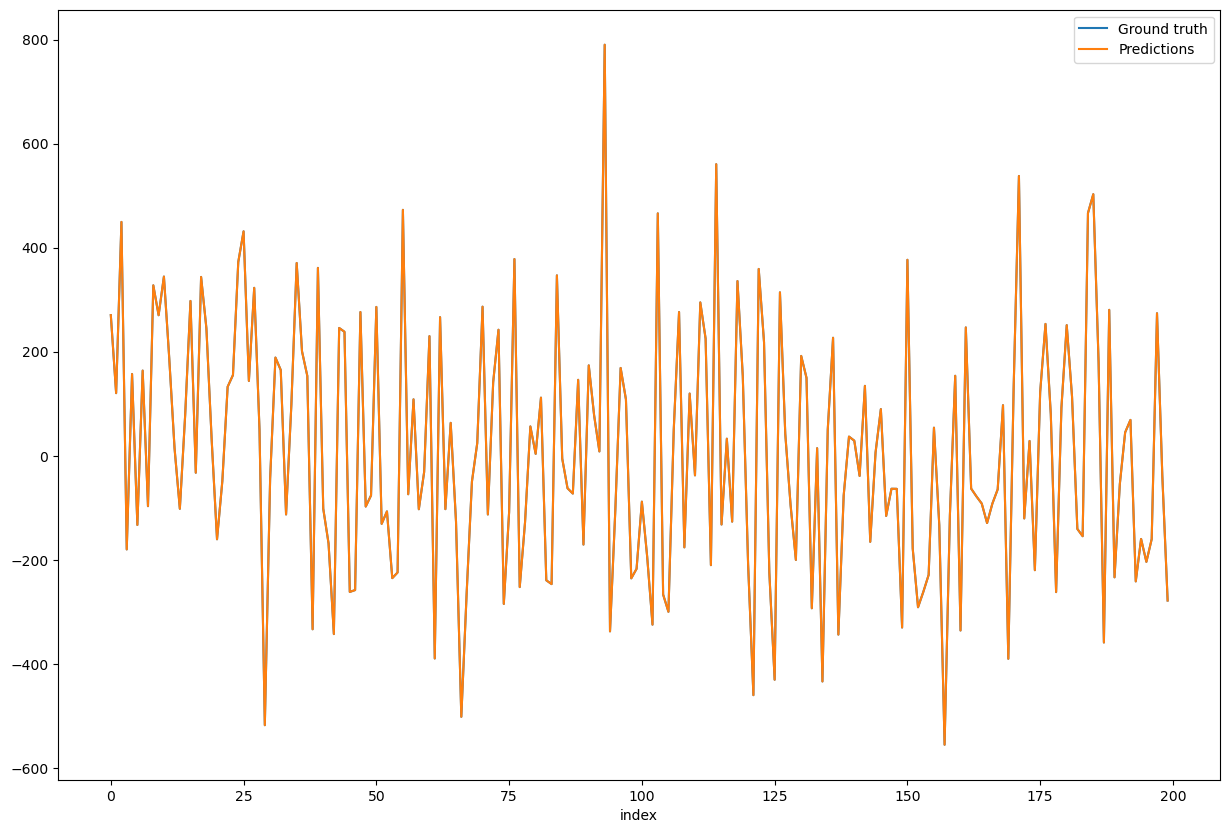

In [77]:
# Visualización

check.reset_index(inplace=True)

check.plot(x='index', y=['Ground truth', 'Predictions'], kind='line', figsize=(15, 10));

## EDA

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index_id            40455 non-null  object 
 1   depth               40455 non-null  float64
 2   table               40455 non-null  float64
 3   x                   40455 non-null  float64
 4   y                   40455 non-null  float64
 5   z                   40455 non-null  float64
 6   carat               40455 non-null  float64
 7   price               40455 non-null  int64  
 8   color_E             40455 non-null  uint8  
 9   color_F             40455 non-null  uint8  
 10  color_G             40455 non-null  uint8  
 11  color_H             40455 non-null  uint8  
 12  color_I             40455 non-null  uint8  
 13  color_J             40455 non-null  uint8  
 14  clarity_IF          40455 non-null  uint8  
 15  clarity_SI1         40455 non-null  uint8  
 16  clar

In [87]:
df_train.describe()

,depth,table,x,y,z,carat,price,color_E,color_F,color_G,...,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,...,40455.000000,40455.000000,40455.00000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,61.752841,57.446133,5.729392,5.732819,3.537154,0.797706,3928.444469,0.181065,0.177407,0.208998,...,0.061896,0.061673,0.06375,0.124756,0.062613,0.064121,0.090545,0.400939,0.253615,0.224818
std,1.431725,2.233535,1.124453,1.146650,0.697062,0.475544,3992.416147,0.385077,0.382017,0.406598,...,0.240969,0.240564,0.24431,0.330446,0.242268,0.244971,0.286965,0.490095,0.435085,0.417467
min,43.000000,43.000000,0.000000,0.000000,0.000000,0.200000,326.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,56.000000,4.710000,4.720000,2.910000,0.400000,945.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61.800000,57.000000,5.690000,5.710000,3.520000,0.700000,2397.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.500000,59.000000,6.540000,6.540000,4.035000,1.040000,5331.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,79.000000,95.000000,10.230000,58.900000,8.060000,4.500000,18823.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
df_train.corr()

,depth,table,x,y,z,carat,price,color_E,color_F,color_G,...,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
depth,1.000000,-0.293114,-0.026348,-0.030966,0.094655,0.026528,-0.014864,-0.030545,-0.020399,-0.000020,...,-0.011078,0.002724,-0.001716,0.006411,-0.009097,0.000961,0.144322,-0.028362,-0.200219,0.027065
table,-0.293114,1.000000,0.196059,0.184673,0.155189,0.183392,0.130111,0.010197,-0.007570,-0.036418,...,0.003223,-0.000543,0.000916,-0.007560,0.001487,0.001560,0.170398,-0.546912,0.336919,0.122945
x,-0.026348,0.196059,1.000000,0.973712,0.984876,0.975688,0.885848,-0.131933,-0.052864,-0.020704,...,-0.000729,0.002095,0.002445,0.001927,-0.003725,-0.002863,0.026772,-0.166217,0.130961,0.006954
y,-0.030966,0.184673,0.973712,1.000000,0.964828,0.951667,0.866163,-0.128834,-0.050855,-0.020458,...,-0.001575,0.001338,0.001828,0.001306,-0.003356,-0.003040,0.028432,-0.157092,0.112749,0.018998
z,0.094655,0.155189,0.984876,0.964828,1.000000,0.967570,0.874500,-0.133865,-0.054114,-0.020867,...,-0.002348,0.002450,0.001682,0.002887,-0.003810,-0.002695,0.043097,-0.164513,0.095518,0.017641
carat,0.026528,0.183392,0.975688,0.951667,0.967570,1.000000,0.921935,-0.137314,-0.064652,-0.025211,...,-0.000812,0.001062,0.002761,0.002449,-0.005591,-0.002223,0.031092,-0.167509,0.120642,0.011722
price,-0.014864,0.130111,0.885848,0.866163,0.874500,0.921935,1.000000,-0.098945,-0.029207,0.012202,...,0.000119,0.002179,0.002892,0.000376,-0.006019,-0.000781,-0.003780,-0.100886,0.100582,0.008903
color_E,-0.030545,0.010197,-0.131933,-0.128834,-0.133865,-0.137314,-0.098945,1.000000,-0.218366,-0.241699,...,-0.001435,0.004601,-0.004196,-0.002299,0.002480,-0.003062,0.005986,-0.002604,-0.018108,0.025866
color_F,-0.020399,-0.007570,-0.052864,-0.050855,-0.054114,-0.064652,-0.029207,-0.218366,1.000000,-0.238712,...,0.006921,-0.003128,-0.002260,-0.008493,-0.005174,0.009722,0.003193,0.005210,-0.014902,0.005655
color_G,-0.000020,-0.036418,-0.020704,-0.020458,-0.020867,-0.025211,0.012202,-0.241699,-0.238712,1.000000,...,0.000674,-0.010475,-0.005725,0.009234,-0.004364,0.003936,-0.024270,0.031019,0.008340,-0.025461


In [92]:
ax = sns.heatmap(df_train, cmap="YlGnBu")

ValueError: could not convert string to float: '5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91b46729d73a27fb57e9'